## 전처리

### 데이터 불러오기

데이터 출처: https://www.kaggle.com/jrobischon/wikipedia-movie-plots/data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wikipedia-movie-plots.zip')

In [3]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
plot = df['Plot']

In [5]:
plot.shape

(34886,)

### train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
plot_train, plot_test = train_test_split(plot, test_size=.2, random_state=1234)

### TDM

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer(stop_words='english', max_features=2000)

In [10]:
x_train = cv.fit_transform(plot_train)
x_test = cv.transform(plot_test)

## gensim을 이용한 LDA

### gensim 설치

아나콘다에서 설치

In [ ]:
!conda install -y gensim

아나콘다가 아닐 경우

In [ ]:
!pip install gensim

### TDM을 gensim의 Corpus 포맷으로 변환

In [8]:
from gensim.matutils import Sparse2Corpus

In [82]:
corpus = Sparse2Corpus(x_train.T) # x_train.T에서 .T는 전치(transpose: 행과 열을 뒤집는 것)

In [83]:
id2word = dict(enumerate(cv.get_feature_names()))

### LDA 분석 실시

In [11]:
from gensim.models.ldamodel import LdaModel

In [85]:
models = {}
for num_topics in [5, 10, 50]:
    models[num_topics] = LdaModel(
        corpus=corpus,
        num_topics=num_topics,
        passes=3,
        iterations=100,
        id2word=id2word,
        random_state=123)

### Perplexity

0에 가까울 수록 더 좋다.

In [86]:
test_corpus = Sparse2Corpus(x_test.T)

In [87]:
for num_topics in models:
    print(num_topics, models[num_topics].log_perplexity(test_corpus))

5 -7.108070179948764
10 -7.105554355511369
50 -7.190093588127462


### 주제 보기

In [88]:
models[10].show_topics()

[(0,
  '0.008*"war" + 0.008*"king" + 0.006*"ship" + 0.006*"men" + 0.006*"group" + 0.006*"army" + 0.006*"world" + 0.005*"killed" + 0.005*"escape" + 0.005*"captain"'),
 (1,
  '0.019*"tom" + 0.017*"house" + 0.010*"jerry" + 0.009*"body" + 0.009*"night" + 0.009*"room" + 0.008*"tells" + 0.008*"home" + 0.008*"finds" + 0.007*"away"'),
 (2,
  '0.021*"father" + 0.021*"love" + 0.017*"family" + 0.013*"mother" + 0.012*"son" + 0.011*"daughter" + 0.009*"life" + 0.009*"marriage" + 0.009*"house" + 0.008*"wife"'),
 (3,
  '0.018*"police" + 0.009*"car" + 0.007*"sam" + 0.007*"killed" + 0.007*"kill" + 0.007*"man" + 0.006*"escape" + 0.006*"gun" + 0.006*"jimmy" + 0.005*"later"'),
 (4,
  '0.010*"school" + 0.010*"new" + 0.008*"time" + 0.007*"film" + 0.007*"day" + 0.007*"home" + 0.006*"tells" + 0.006*"friends" + 0.006*"life" + 0.005*"father"'),
 (5,
  '0.055*"frank" + 0.054*"charlie" + 0.046*"johnny" + 0.041*"nick" + 0.038*"raja" + 0.028*"helen" + 0.019*"linda" + 0.018*"jackie" + 0.017*"anand" + 0.014*"kelly"'),

In [89]:
models[10].show_topic(0)

[('war', 0.007855945),
 ('king', 0.0077317017),
 ('ship', 0.006199054),
 ('men', 0.006128602),
 ('group', 0.0057548573),
 ('army', 0.0055977134),
 ('world', 0.005520351),
 ('killed', 0.0051553347),
 ('escape', 0.0049308473),
 ('captain', 0.0049248543)]

### 문서의 주제

In [109]:
row = x_test[0]
doc = list(zip(row.indices, row.data))
doc

[(9, 1),
 (30, 1),
 (78, 1),
 (110, 1),
 (112, 1),
 (129, 2),
 (131, 2),
 (189, 1),
 (260, 1),
 (261, 1),
 (331, 2),
 (347, 1),
 (352, 1),
 (356, 2),
 (413, 2),
 (415, 1),
 (426, 1),
 (434, 1),
 (437, 1),
 (448, 1),
 (476, 1),
 (496, 1),
 (503, 1),
 (534, 1),
 (585, 1),
 (638, 1),
 (644, 2),
 (657, 1),
 (743, 1),
 (767, 1),
 (798, 1),
 (843, 1),
 (907, 5),
 (937, 1),
 (1023, 1),
 (1055, 1),
 (1071, 4),
 (1075, 1),
 (1111, 1),
 (1133, 1),
 (1151, 1),
 (1181, 2),
 (1188, 3),
 (1206, 1),
 (1211, 1),
 (1215, 1),
 (1235, 1),
 (1244, 1),
 (1248, 1),
 (1267, 2),
 (1277, 1),
 (1293, 1),
 (1399, 1),
 (1485, 1),
 (1495, 1),
 (1536, 1),
 (1545, 5),
 (1551, 1),
 (1573, 1),
 (1621, 4),
 (1668, 2),
 (1671, 1),
 (1744, 1),
 (1844, 1),
 (1867, 1),
 (1884, 1),
 (1971, 1)]

In [110]:
for i, n in doc:
    print(id2word[i], n)

aboard 1
adult 1
animals 1
arrive 1
arrives 1
attack 2
attacks 2
better 1
captain 1
capture 1
circus 2
coast 1
collect 1
comes 2
creature 2
crew 1
cut 1
dangerous 1
dark 1
deal 1
despite 1
died 1
discover 1
drive 1
enter 1
fear 1
feet 2
finally 1
goes 1
group 1
having 1
hoping 1
island 5
joe 1
later 1
like 1
london 4
looking 1
manage 1
master 1
men 1
monster 2
mother 3
names 1
navy 1
nearly 1
note 1
offered 1
officer 1
owner 2
park 1
people 1
public 1
rescues 1
return 1
royal 1
ryan 5
sam 1
sea 1
ship 4
son 2
soon 1
study 1
treasure 1
turns 1
university 1
woman 1


In [93]:
models[10].get_document_topics(doc)

[(0, 0.7228719),
 (2, 0.06179989),
 (3, 0.024760846),
 (8, 0.093357325),
 (9, 0.09183118)]

## Latent Semantic Analysis

In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
svd = TruncatedSVD(n_components=100, random_state=1234)

In [13]:
svd.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=1234, tol=0.0)

In [14]:
from matplotlib import pyplot

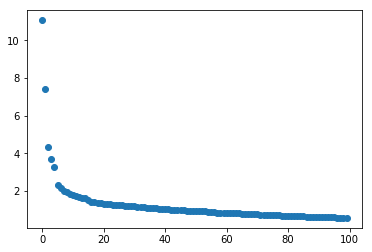

In [15]:
pyplot.plot(svd.explained_variance_, 'o')

### 차원 축소

In [16]:
x_test.shape

(6978, 2000)

In [17]:
doc_emb = svd.transform(x_test)

In [18]:
doc_emb.shape

(6978, 100)

### 주제 보기

In [19]:
svd.components_.shape

(100, 2000)

In [20]:
loading = pd.DataFrame(svd.components_.T)

In [21]:
loading['word'] = cv.get_feature_names()

In [24]:
i = 0
loading.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1797,0.190082,tells
636,0.184727,father
850,0.143918,house
838,0.143609,home
1110,0.135895,man


## Non-negative Matrix Factorization

In [34]:
from sklearn.decomposition import NMF

In [35]:
nmf = NMF(n_components=20, random_state=1234)
nmf.fit(x_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=1234, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

### 주제 보기

In [36]:
loading = pd.DataFrame(nmf.components_.T)

In [37]:
loading['word'] = cv.get_feature_names()

In [41]:
i = 5
loading.sort_values(i, ascending=False).loc[:, [i, 'word']].head(10)

,5,word
1151,4.746426,men
986,3.824056,killed
767,3.338384,group
589,3.267987,escape
985,3.257324,kill
1621,2.963989,ship
992,2.874034,king
129,2.562178,attack
989,2.498459,kills
451,2.462237,death


In [39]:
emb = nmf.transform(x_test)

In [40]:
sorted(list(enumerate(emb[0])), key=lambda x: x[1], reverse=True)

[(5, 0.15739583196748802),
 (11, 0.06405412059142378),
 (7, 0.055600047668369984),
 (4, 0.04713942200608705),
 (13, 0.02936863750661348),
 (0, 0.0041040657845773055),
 (12, 0.0011513740593924533),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (6, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0)]